In [163]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt
import re
import pandas as pd
import joblib
import numpy as np


In [164]:
# dataset_dir = 'sentiment140'
# dataset_dir = 'imdb'
dataset_dir = 'coronaNLP'

# n_gram = (1, 1)
# n_gram = (1, 2)
n_gram = (2, 2)

# importing the processed dataframe
df = joblib.load(f'./dataframes/df_{dataset_dir}.pkl')

df.head()



,OriginalTweet,Sentiment
0,gahan,0
1,advic talk neighbour famili exchang phone numb...,1
2,coronavirus australia woolworth give elder dis...,1
3,food stock onli one empti pleas dont panic eno...,1
4,readi go supermarket dure covid19 outbreak bec...,-2


In [165]:

X = df.iloc[:, 0]


y = df.iloc[:, 1]

X, y

(0                                                    gahan
 1        advic talk neighbour famili exchang phone numb...
 2        coronavirus australia woolworth give elder dis...
 3        food stock onli one empti pleas dont panic eno...
 4        readi go supermarket dure covid19 outbreak bec...
                                ...                        
 41152    airlin pilot offer stock supermarket shelv nz ...
 41153    respons complaint provid cite covid19 relat de...
 41154    know itâ get tough ration toilet paper corona...
 41155    wrong smell hand sanit start turn coronavirus ...
 41156    well newus rift go 70000 amazon rn although no...
 Name: OriginalTweet, Length: 41157, dtype: object,
 0        0
 1        1
 2        1
 3        1
 4       -2
         ..
 41152    0
 41153   -2
 41154    1
 41155    0
 41156   -1
 Name: Sentiment, Length: 41157, dtype: int32)

C:\Users\Enes\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

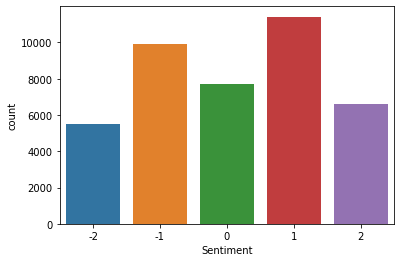

In [166]:
sns.countplot(y)


Text(0.5, 1.0, 'Positive words cloud')

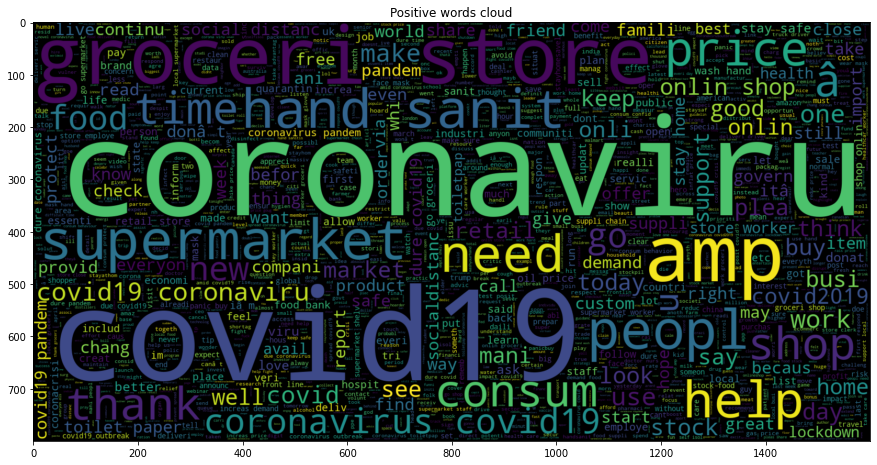

In [167]:
plt.figure(figsize=(15, 15))
options = [1, 2]
cond = df.iloc[:, 1].isin(options)
result = df[cond].iloc[:, 0].values
wc = WordCloud(max_words=2000, width=1600,
               height=800).generate(" ".join(result))
plt.imshow(wc, interpolation='bilinear')
plt.title('Positive words cloud')


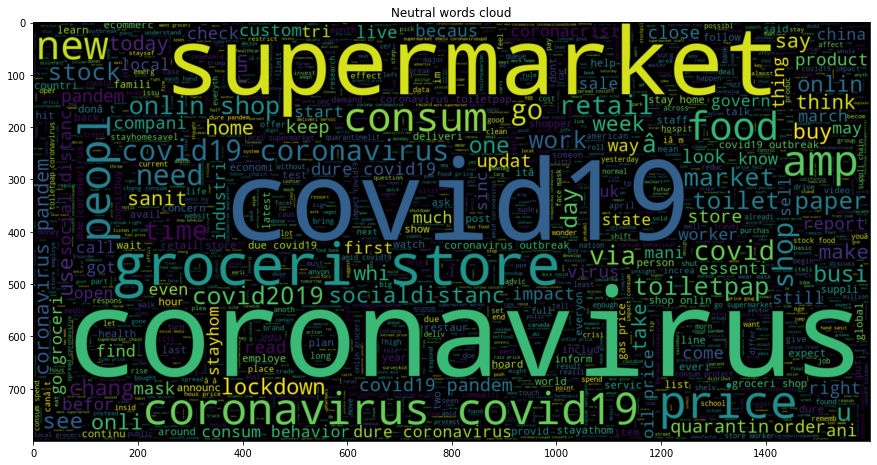

In [168]:
if dataset_dir == 'coronaNLP':
    plt.figure(figsize=(15, 15))
    options = [0]
    cond = df.iloc[:, 1].isin(options)
    result = df[cond].iloc[:, 0].values
    wc = WordCloud(max_words=2000, width=1600,
                   height=800).generate(" ".join(result))
    plt.imshow(wc, interpolation='bilinear')
    plt.title('Neutral words cloud')


Text(0.5, 1.0, 'Negative words cloud')

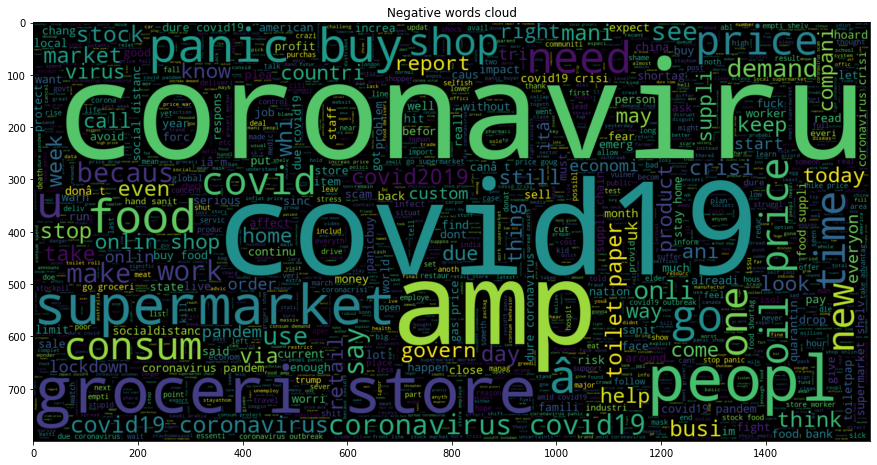

In [169]:
if dataset_dir == 'imdb' or dataset_dir == 'sentiment140':
    options = [0]
else:
    options = [-1, -2]

plt.figure(figsize=(15, 15))
cond = df.iloc[:, 1].isin(options)
result = df[cond].iloc[:, 0].values
wc = WordCloud(max_words=2000, width=1600,
               height=800).generate(" ".join(result))
plt.imshow(wc, interpolation='bilinear')
plt.title('Negative words cloud')


In [170]:

tfidf = joblib.load(
    f"./vectors/vectorizer_{dataset_dir}_{n_gram}.pkl")
tfidf

TfidfVectorizer(max_features=43771, ngram_range=(2, 2),
                tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[a-zA-Z0-9]+', gaps=False, discard_empty=True, flags=<RegexFlag.UNICODE|DOTALL|MULTILINE: 56>)>)

In [171]:
tfidf.vocabulary_, tfidf.idf_

({'phone number': 28149,
  'set onlin': 33806,
  'onlin shop': 25875,
  'shop account': 34112,
  'coronavirus australia': 7948,
  'give elder': 16214,
  'elder disabl': 12828,
  'disabl dedic': 11314,
  'dedic shop': 10735,
  'shop hour': 34246,
  'hour amid': 18586,
  'amid covid19': 1873,
  'covid19 outbreak': 9502,
  'food stock': 15177,
  'stock onli': 36069,
  'onli one': 25713,
  'empti pleas': 13059,
  'pleas dont': 28372,
  'dont panic': 12002,
  'panic enough': 26653,
  'enough food': 13156,
  'food everyon': 14970,
  'everyon take': 13682,
  'take need': 38477,
  'need stay': 24682,
  'stay calm': 35708,
  'calm stay': 4747,
  'stay safe': 35734,
  'covid19 covid19': 9176,
  'covid19 coronavirus': 9154,
  'readi go': 30778,
  'go supermarket': 16723,
  'supermarket dure': 37102,
  'dure covid19': 12463,
  'becaus im': 3478,
  'becaus food': 3467,
  'empti coronavirus': 13045,
  'coronavirus serious': 8449,
  'serious thing': 33560,
  'thing pleas': 39368,
  'panic caus': 2663

In [172]:

X = tfidf.transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape

((32925, 43771), (32925,))

In [173]:

# creating our pipeline that will return an estimator
pipeline = Pipeline([('clf', MultinomialNB())])


In [174]:

parameters = {
    'clf__fit_prior': (False, True),
    'clf__alpha': (5, 1, 0.1, 0.01, 0.001)
    }

clf = GridSearchCV(pipeline, param_grid=parameters, scoring='accuracy', cv=5, verbose=1)
clf

GridSearchCV(cv=5, estimator=Pipeline(steps=[('clf', MultinomialNB())]),
             param_grid={'clf__alpha': (5, 1, 0.1, 0.01, 0.001),
                         'clf__fit_prior': (False, True)},
             scoring='accuracy', verbose=1)

In [175]:

clf = clf.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [176]:

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -2       0.37      0.42      0.40      1056
          -1       0.40      0.38      0.39      2006
           0       0.41      0.46      0.43      1553
           1       0.39      0.37      0.38      2287
           2       0.45      0.45      0.45      1330

    accuracy                           0.41      8232
   macro avg       0.41      0.41      0.41      8232
weighted avg       0.41      0.41      0.41      8232



In [177]:

print("Best: %f using %s" % (clf.best_score_, 
    clf.best_params_))
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.398117 using {'clf__alpha': 1, 'clf__fit_prior': False}
0.392650 (0.009235) with: {'clf__alpha': 5, 'clf__fit_prior': False}
0.326986 (0.002481) with: {'clf__alpha': 5, 'clf__fit_prior': True}
0.398117 (0.006005) with: {'clf__alpha': 1, 'clf__fit_prior': False}
0.379347 (0.005887) with: {'clf__alpha': 1, 'clf__fit_prior': True}
0.384996 (0.006048) with: {'clf__alpha': 0.1, 'clf__fit_prior': False}
0.393500 (0.007010) with: {'clf__alpha': 0.1, 'clf__fit_prior': True}
0.374548 (0.006543) with: {'clf__alpha': 0.01, 'clf__fit_prior': False}
0.381109 (0.006229) with: {'clf__alpha': 0.01, 'clf__fit_prior': True}
0.368747 (0.004402) with: {'clf__alpha': 0.001, 'clf__fit_prior': False}
0.376674 (0.004949) with: {'clf__alpha': 0.001, 'clf__fit_prior': True}


In [178]:

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

acc = int(accuracy_score(y_test, y_pred)*100)


[[446 320 120 128  42]
 [362 755 313 416 160]
 [145 267 711 337  93]
 [184 404 435 836 428]
 [ 53 121 146 412 598]]


In [181]:
test_tweet = "groceri store"
vector = tfidf.transform([test_tweet])

print(clf.predict(vector))


[1]


In [180]:

# exporting the pipeline
joblib.dump(clf.best_estimator_, f'./models/mnb_{dataset_dir}_{acc}_{n_gram}.pkl')

['./models/mnb_coronaNLP_40_(2, 2).pkl']